
# **Task 1: LRP applied onto a Fully Connected (FC) Neural Network**

In this task, the interest is in computing the
relevance at particular elements of a small, fully connected neural network. The network consists of only one input layer (its neurons are indexed by ($i$), one hidden ($j$) and one output layer ($k$). $x_i$ represents the values of the input neurons, $x_j$ the outputs of the hidden layer neurons and $x_k$ the outputs of the output layer neurons. The nonlinear function of the hidden layer is the ReLU, which is expressed by the equation $x_j = max(0, \sum_i x_i w_{ij} + b_j)$. $w_{ij}\:$  are the weights between the $i$-th and $j$-th layer and $b_j$ the bias (omitted in this task). The nonlinear function performed by the output layer is the sum pooling function, expressed by $x_k = \sum_j x_j$. The overall architecture of the network is shown in the first figure and the functionality of each neuron is depicted in the second.

This task does not use a pre-defined dataset. The input of the neural network as well as the weights will be selected by the users. We encourage the users to try out as many possible combinations of inputs and weights possible. LRP will be applied to compute the relevances of each neuron and input.

In [1]:
################################################################################
# [0.] Installation of the necessary packages ==================================
################################################################################

!pip3 install scipy
!pip3 install matplotlib

In [ ]:
################################################################################
# Figure of the overall architecture of the FC network =========================
################################################################################

from google.colab import drive
drive.mount('/content/drive/')

from IPython.display import Image
Image("/content/drive/MyDrive/figures/FC_Neural_Network_A.png")


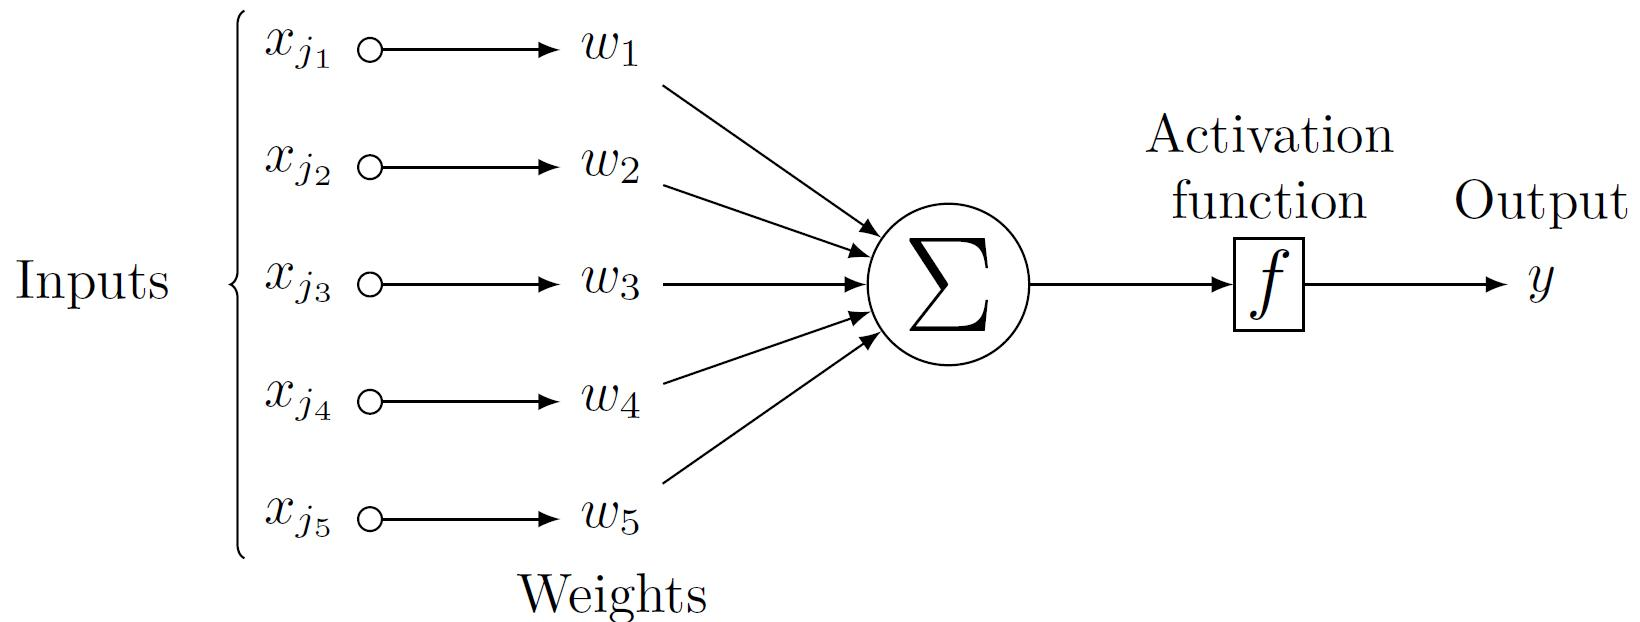

In [ ]:
################################################################################
# Figure of the functionality of one neuron - the one of the output layer, =====
# but can be extended to all neurons without loss of generality ================
################################################################################

from IPython.display import Image
Image("/content/drive/MyDrive/figures/FC_Neural_Network_B.jpeg")

In [ ]:
################################################################################
# Mathematical euqations for the computation of relevances (R) =================
# in the output (k), hidden (j) and input (i) layer. ===========================
################################################################################
from IPython.display import Math, HTML

# The output layer's (k) output is the sum of the all inputs x_j ---------------
# The relevance R_k of the neuron in this layer --------------------------------
# is also the sum of all its inputs --------------------------------------------

# The output x_j of each neuron in layer (j) -----------------------------------
# (each of them is subscripted with j) -----------------------------------------
# is either zero or equals to the sum of the weighted inputs -------------------
# plus the bias term -----------------------------------------------------------

Math(r'x_j = max(0, \sum_i x_i w_{ij} + b_j) \\ R_k = x_k = \sum_j x_j \\ ')

In [ ]:
# The relevance of each neuron j in layer (j) is R_j. --------------------------
# This can be deduced from the equation that computes x_j ----------------------
# and by the observation that the root point (x_tilde) equals to zero. ---------

from IPython.display import Math

Math(r'R_j = R_k(\tilde{\mathbf{x}}) + \frac{\partial R_k}{\partial x_j} \biggr\rvert_{\{ \tilde{x}_j \}} \cdot (x_j - \tilde{x}_j) = x_j = max(0, \sum_i x_i w_{ij} + b_j) \\' )




<IPython.core.display.Math object>

In [ ]:
# The relevance of each neuron i in layer (i), which is practically the input --
# is R_i. The mathematical equations behind this computation -------------------
# can be found in the referenced sources and are out of scope of this ----------
# task. What is important to emphasize is that the relevance is proportional ---
# to the power of the weights - remember that the weights can be ---------------
# positive and negative --------------------------------------------------------

from IPython.display import Math

Math(r'R_i = \sum_j \frac{w_{ij}^2}{\sum_{\'{i}}} w_{\acute{\'{i}}j}^2} R_j')

<IPython.core.display.Math object>

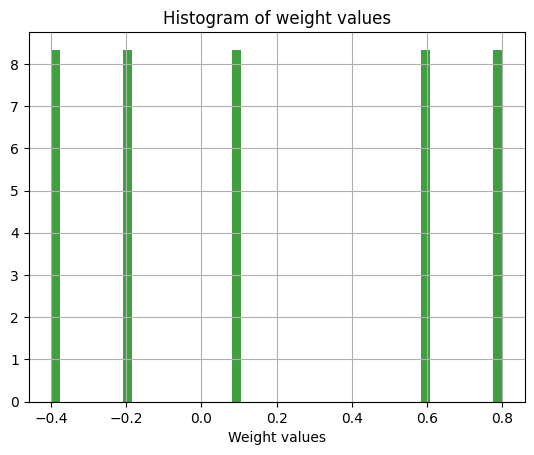

In [1]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# [1.] Define input, weights ===================================================
#      and see their distribution with a histogram =============================
################################################################################

# i: input layer, j: hidden layer, k: output layer

# 1.1. Values selected by user -------------------------------------------------
x_i_dict = {'x_1': 3, 'x_2': 4, 'x_3': -10}

w_j_1_dict = {'w_i1_j1': -0.2, 'w_i2_j1': 0.5, 'w_i3_j1': -0.1}
w_j_2_dict = {'w_i1_j2': -0.25, 'w_i2_j2': 0.1, 'w_i3_j2': 0.4}
w_j_3_dict = {'w_i1_j3': 0.2, 'w_i2_j3': -0.3, 'w_i3_j3': -0.2}
w_j_4_dict = {'w_i1_j4': 0.5, 'w_i2_j4': -0.8, 'w_i3_j4': 0.6}
w_j_5_dict = {'w_i1_j5': 0.1, 'w_i2_j5': 0.4, 'w_i3_j5': 0.7}

w_k_dict = {'w_j1_k1': 0.8, 'w_j2_k1': 0.1, 'w_j3_k1': -0.2,
            'w_j4_k1': -0.4, 'w_j5_k1': 0.6}


# 1.2. Randomly (Normally distributed) values ----------------------------------
mu, sigma = 0, 0.05
x_i_normal = np.random.normal(mu, sigma, 3)

x_j_1_normal = np.random.normal(mu, sigma, 3)
x_j_2_normal = np.random.normal(mu, sigma, 3)
x_j_3_normal = np.random.normal(mu, sigma, 3)
x_j_4_normal = np.random.normal(mu, sigma, 3)
x_j_5_normal = np.random.normal(mu, sigma, 3)

x_k_normal = np.random.normal(mu, sigma, 5)


# Histogram of weights ---------------------------------------------------------
n, bins, patches = plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Weight values')
plt.title('Histogram of weight values')
plt.grid(True)
plt.show()


The objective of the task is to encourage the user to select input values as well as weight values randomly or purposefully and see how the output of the neurons, as well as the relevances, change according to those changes. The variables "x_i_dict", "w_j_1_dict" ... "w_j_5_dict", "w_k_dict" correspond to the variables in the above defined mathematical equations. One can also generate weights that follow a distribution or are completely random. In this example, we set it to gaussian, but it can be easily replaced.

In [2]:
################################################################################
# [2.] Compute equations of feedforward pass ===================================
# Apply those equations to compute the output of the network ===================
################################################################################
sum_j1 = x_i_dict['x_1'] * w_j_1_dict['w_i1_j1'] + \
         x_i_dict['x_2'] * w_j_1_dict['w_i2_j1'] + \
         x_i_dict['x_3'] * w_j_1_dict['w_i3_j1']

sum_j2 = x_i_dict['x_1'] * w_j_2_dict['w_i1_j2'] + \
         x_i_dict['x_2'] * w_j_2_dict['w_i2_j2'] + \
         x_i_dict['x_3'] * w_j_2_dict['w_i3_j2']

sum_j3 = x_i_dict['x_1'] * w_j_3_dict['w_i1_j3'] + \
         x_i_dict['x_2'] * w_j_3_dict['w_i2_j3'] + \
         x_i_dict['x_3'] * w_j_3_dict['w_i3_j3']

sum_j4 = x_i_dict['x_1'] * w_j_4_dict['w_i1_j4'] + \
         x_i_dict['x_2'] * w_j_4_dict['w_i2_j4'] + \
         x_i_dict['x_3'] * w_j_4_dict['w_i3_j4']

sum_j5 = x_i_dict['x_1'] * w_j_5_dict['w_i1_j5'] + \
         x_i_dict['x_2'] * w_j_5_dict['w_i2_j5'] + \
         x_i_dict['x_3'] * w_j_5_dict['w_i3_j5']

# Apply ReLU -------------------------------------------------------------------
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

# Compute the output of the NN -------------------------------------------------
val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Output value of the network: {val_k1}")


Output value of the network: 3.8


In [3]:
################################################################################
################################################################################
################################################################################
# [3.] Compute the relevances of each neuron in all layers =====================
# The relevances computations follow the mathematical formulas defined above. ==
################################################################################
################################################################################
################################################################################

################################################################################
# [3.1] Compute relevance of output layer (k) ==================================
################################################################################
R_k = val_k1

print(f"Relevances of neurons of k layer: {R_k}")

################################################################################
# [3.2] Compute relevance of every one of the 5 neurons of the layer (j) =======
################################################################################
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Relevances of neurons of j layer: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")

################################################################################
# [3.3] Compute relevance of every one of the 3 neurons of the layer (i) =======
################################################################################
sum_j1_power = w_j_1_dict['w_i1_j1'] ** 2 + \
               w_j_1_dict['w_i2_j1'] ** 2 + \
               w_j_1_dict['w_i3_j1'] ** 2

sum_j2_power = w_j_2_dict['w_i1_j2'] ** 2 + \
               w_j_2_dict['w_i2_j2'] ** 2 + \
               w_j_2_dict['w_i3_j2'] ** 2

sum_j3_power = w_j_3_dict['w_i1_j3'] ** 2 + \
               w_j_3_dict['w_i2_j3'] ** 2 + \
               w_j_3_dict['w_i3_j3'] ** 2

sum_j4_power = w_j_4_dict['w_i1_j4'] ** 2 + \
               w_j_4_dict['w_i2_j4'] ** 2 + \
               w_j_4_dict['w_i3_j4'] ** 2

sum_j5_power = w_j_5_dict['w_i1_j5'] ** 2 + \
               w_j_5_dict['w_i2_j5'] ** 2 + \
               w_j_5_dict['w_i3_j5'] ** 2

R_i1 = ((w_j_1_dict['w_i1_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i1_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i1_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i1_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i1_j5'] ** 2) / sum_j5_power) * R_j5

R_i2 = ((w_j_1_dict['w_i2_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i2_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i2_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i2_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i2_j5'] ** 2) / sum_j5_power) * R_j5

R_i3 = ((w_j_1_dict['w_i3_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i3_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i3_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i3_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i3_j5'] ** 2) / sum_j5_power) * R_j5


print(f"Relevances of neurons of i layer: {R_i1}, {R_i2}, {R_i3}")


Relevances of neurons of k layer: 3.8
Relevances of neurons of j layer: 2.4, 0, 1.4000000000000001, 0, 0
Relevances of neurons of i layer: 0.6494117647058824, 2.741176470588235, 0.4094117647058824


In [4]:
################################################################################
# Positivity and conservativity properties =====================================
# For every input x and every neuron p the relevance is positive ===============
# The sum of relevances of all neurons in layer (i) ============================
# equals the sum of relevances of all neurons in layer (j) =====================
################################################################################

Math(r'\forall \mathbf{x}, p: R_p(\mathbf{x}) \geq 0 \\ \sum_i R_i = \sum_j R_j ')

NameError: name 'Math' is not defined

In [5]:
################################################################################
################################################################################
################################################################################
# [4.] Check that the computations of the relevance obay =======================
# the positivity and conservativity properties =================================
# (see cell above), with the help of assertions and unit tests =================
################################################################################
################################################################################
################################################################################


################################################################################
# [4.1] Check positivity =======================================================
################################################################################

assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

assert R_j1 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j2 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j3 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j4 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j5 >=0, "Relevance of every neuron of every layer must be positive"

assert R_i1 >=0, "Relevance of every neuron of every layer must be positive"
assert R_i2 >=0, "Relevance of every neuron of every layer must be positive"
assert R_i3 >=0, "Relevance of every neuron of every layer must be positive"


################################################################################
# [4.2] Check conservativity ===================================================
################################################################################
sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservativity j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservativity i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")

 Conservativity j --to--> k: sum_Rj: 3.8, R_k: 3.8
 Conservativity i --to--> j: sum_Ri: 3.8, sum_Rj: 3.8


In [6]:
import unittest

class TestLRPProperties(unittest.TestCase):

    def test_relevance_positivity(self):

        assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

        assert R_j1 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j2 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j3 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j4 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j5 >=0, "Relevance of every neuron of every layer must be positive"

        assert R_i1 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_i2 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_i3 >=0, "Relevance of every neuron of every layer must be positive"


    def test_relevance_conservativity(self):
        self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
        self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)


unittest.main(argv=[''], verbosity=2, exit=False)

test_relevance_conservativity (__main__.TestLRPProperties.test_relevance_conservativity) ... ok
test_relevance_positivity (__main__.TestLRPProperties.test_relevance_positivity) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK
